### Build a Confidence Interval for determining what the average height of coffee drinkers is

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('coffee_dataset.csv')

In [5]:
df.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [3]:
# Rename height column to specify centimeters

In [25]:
test_df = df.sample(len(df))
test_df.query('user_id == 4509')

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179


In [11]:
# Subset of original df (taking 200 random records from original df)
df_sample = df.sample(300)

In [12]:
df.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [13]:
df.query('user_id == 4509')

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179


In [14]:
df_sample.head()

,user_id,age,drinks_coffee,height
1006,7855,<21,False,66.523390
1597,2112,<21,False,63.938518
2234,6425,>=21,True,69.464484
1223,7618,<21,False,66.064001
1987,7104,<21,False,66.734852


In [15]:
df_sample.query('user_id == 4509')

,user_id,age,drinks_coffee,height


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2974 non-null   int64  
 1   age            2974 non-null   object 
 2   drinks_coffee  2974 non-null   bool   
 3   height         2974 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 72.7+ KB


In [17]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1006 to 110
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        300 non-null    int64  
 1   age            300 non-null    object 
 2   drinks_coffee  300 non-null    bool   
 3   height         300 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 9.7+ KB


In [18]:
# From the sample, how many people drink coffee?
df_sample.drinks_coffee.mean()

0.6066666666666667

In [22]:
# What is the average height of people who drink coffee?
df_sample.query('drinks_coffee == True').height.mean()

68.42726872819536

In [ ]:
# Run 10,000 iterations of 300-sample records from df and find the averages of all samples.
averages = []
for _ in range(20000):
    sample = df_sample.sample(30, replace=True)
    averages.append(sample.query('drinks_coffee == True').height.mean())
    
# averages

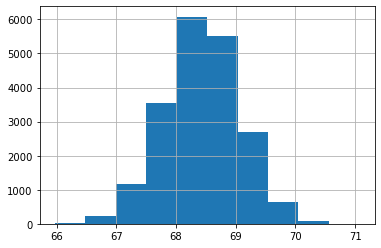

In [29]:
# Plot the distribution
plt.grid(True)
plt.hist(averages);

In [32]:
x = round(np.percentile(averages, 2.5), 2)
y = round(np.percentile(averages, 97.5), 2)

In [33]:
x

67.19

In [34]:
y

69.65

In [35]:
print(f"We can say with 95% confidence that the average height of all coffee drinkers is between {x} and {y} inchest tall.")

We can say with 95% confidence that the average height of all coffee drinkers is between 67.19 and 69.65 inchest tall.


In [36]:
# Determine what the actual population mean was and determine if you're correct
df.query('drinks_coffee == True').height.mean()

68.40021025548381

### Find the difference in the average height of coffee drinkers vs non-coffee drinkers

In [84]:
b_sample = df_sample = df.sample(300, replace=True)
c_y = b_sample.query('drinks_coffee == True').height.mean()
c_n = b_sample.query('drinks_coffee == False').height.mean()
c_y - c_n

1.3480235719989508

In [78]:
diffs = []
for _ in range(10000):
    sample = df_sample.sample(300, replace=True)
    c_y = sample.query('drinks_coffee == True').height.mean()
    c_n = sample.query('drinks_coffee == False').height.mean()
    diffs.append(c_y - c_n)

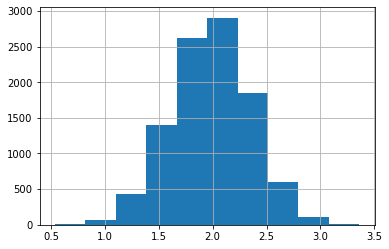

In [80]:
plt.grid(True)
plt.hist(diffs);

In [85]:
np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)

(1.2661059139031392, 2.7010445826720155)

In [ ]:
# If the difference is not 0, then that means yhere IS  difference in height.
# On average, coffee drinkers are taller than non-coimport ffee drinkers

### Use cases for confidence intervals
1. Comparing the effectiveness of different drugs by comparing two groups that take two different drugs

2. Comparing group that takes a drug vs the ones who don't at all

#### Pros
1. Useful in ensuring the difference in means of confidence intervals are reliable and statistical, vs just a random occurrence with no repeatability.

#### Cons
1. Not the easiest to determine practical vs. statistical significance
 - Statistical: Determine which ads generate most interest in business. Send two different ads to same number of randomly selected users. Build conficence interval to show which ad people click through on. Let's say the second ad shows better numbers.
 - Practical: If the first ad is less expensive to create and drives in OK, but the 2nd ad is more expensive, but also drives in good business... This takes into consideration the real world knowledge of a person to determine which ad to use based on other probable or unforseen factors: space, time and money.
 
#### Importance of bootstrapping
1. Doesn't have assumption of intervals
2. Bootstrap only assumes data retrieved of a sample of a population

#### With large samples
1. Bootstrapping and traditional methods with usually yield similar results

** <strong>You cannot make specifications about each individual of a population with confidence intervals. You can only make generalizations based on the data you have. In Machine Learning, there are certain approaches to take that do make spcifications, but confidence intervals, by nature are only used to look at an aggregated result. </strong> **

### Traditional Confidence Interval calculation

In [93]:
import statsmodels.stats.weightstats as sms

X1 = sample.query('drinks_coffee == True').height
X2 = sample.query('drinks_coffee == False').height

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
cm.tconfint_diff()

(1.0495568158946909, 2.501575361139159)